# Week1 checkpoint

## Genome Assembly

### Command
spades.py --careful -o /home/shaoboyang/Comp-MCB/project  \
-1 /bigdata/FinalProject_data/190724_SARA_Genomes/SARA_12_S35_L004_R1_001.fastq.gz  \
-2/bigdata/FinalProject_data/190724_SARA_Genomes/SARA_12_S35_L004_R2_001.fastq.gz  \
-t 1  \
-m 16  

## Annotation

Finish on the rast.
http://rast.nmpdr.org/?page=JobDetails&job=796713

### statistic
$ assembly-stats contigs.fasta\
stats for contigs.fasta\
sum = 4910656, n = 217, ave = 22629.75, largest = 577530\
N50 = 223922, n = 7\
N60 = 152739, n = 10\
N70 = 129461, n = 13\
N80 = 80319, n = 19\
N90 = 54239, n = 26\
N100 = 56, n = 217\
N_count = 0\
Gaps = 0


### Histogram of contig lengths

In [ ]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import Phylo
from io import StringIO
import matplotlib
import matplotlib.pyplot as plt

In [2]:
contigs = []
for seq in SeqIO.parse("contigs.fasta","fasta"):
    contigs.append(seq)

In [13]:
conlen = []
iden = []
for i in range(len(contigs)):
    conlen.append(len(contigs[i]))
    iden.append(i+1)

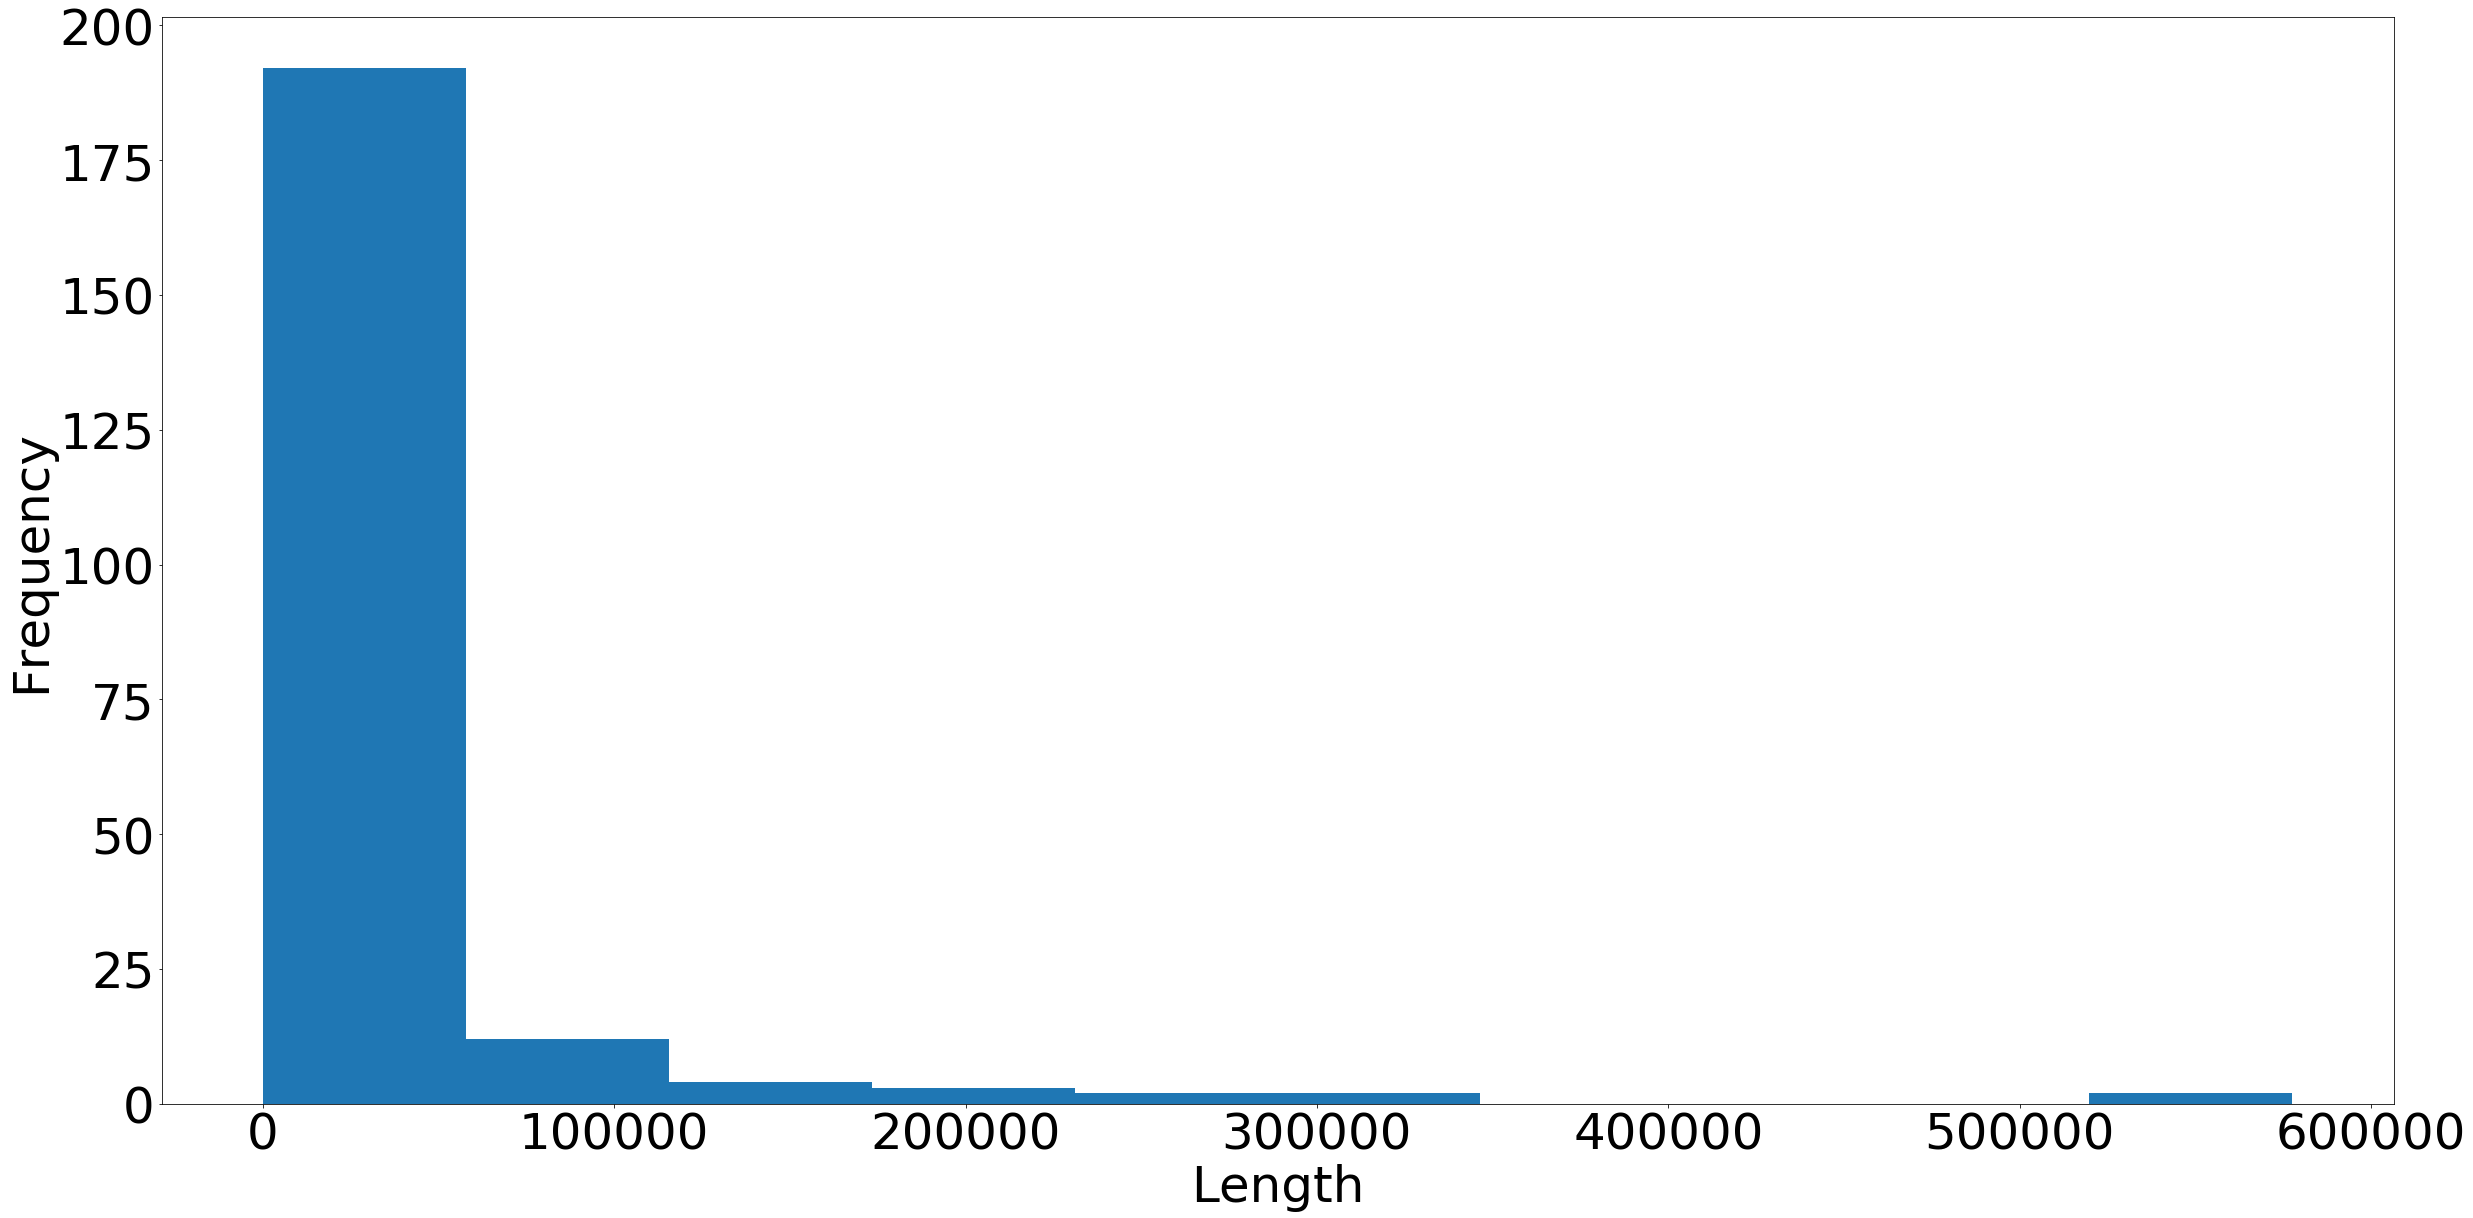

In [21]:
plt.figure(figsize=(40,20))
plt.hist(conlen)
plt.xlabel('Length', fontdict={'weight': 'normal', 'size': 50})
plt.ylabel('Frequency', fontdict={'weight': 'normal', 'size': 50})
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.show()

**RAST results** \
gram-negative\
auxin biosynthetic potential \
http://rast.nmpdr.org/?page=JobDetails&job=796713 

**Record assembly stats to text file**
assembly-stats contigs.fasta scaffolds.fasta > assembly_stats.txt 

**Create an rRNA.gff file with the Lab 9 HMM database**\
rna_hmm3.py -i /bigdata/FinalProject_groups/Group_12/project/contigs.fasta

-o /bigdata/FinalProject_groups/Group_12/rRNAoutput.gff

-L /data/Lab9_data/HMM3 

**Create fasta list of 16S genes**\
bedtools getfasta -fi ~/BioE131/Final/contigs.fasta -bed /bigdata/FinalProject_groups/Group_12/rRNAoutput.gff > /bigdata/FinalProject_groups/Group_12/16S_rRNA_genes.fasta

**Ran SeqMatch with the 16S_rRNA_genes.fasta file using these settings**

best hit: **_Salmonella enterica_**


**AntiSMASH**

The reads we have contain 2 potential biosynthetic gene clusters. The first is a nonribosomal peptide synthetase encoding gene cluster that is highly conserved in _Salmonella enterica_. It is likely a sideophore in the tris catecholate family (this includes the studied enterobactins). The second gene cluster is a thiopeptide which is also highly conserved in _Salmonella enterica_ species. Thiopeptides are often antibiotics effective against gram-postive bacteria. This particular gene cluster is known to be highly upregulated in Salmonella after infecting mice (https://mbio.asm.org/content/9/6/e02032-18).
https://antismash.secondarymetabolites.org/upload/bacteria-63fd4b30-ae58-438a-b28a-e484ddb0a306/index.html
